In [464]:
class Information():  
    
    import pandas as pd
    import numpy as np
    from pandas import Series, DataFrame
    import matplotlib.pyplot as plt
    import seaborn as sns
    from numpy import unique
    def __init__(self, data):
        self.data=data
    def allinfo(self):
        print("DATA HEAD")
        print(self.data.head())
        print("DATA DESCRIBE")
        print(self.data.describe())
        print("DATA INFORMATION")
        print(self.data.info())
        print("DATA TAIL")
        print(self.data.tail())
        print("DATA NULL VALUES")
        print(self.data.isnull().sum())
        sns.heatmap(self.data.isnull(), yticklabels=False, cbar=False, cmap='viridis')   
    def copy(self):
        newdata = self.data.copy()
        print(newdata)
    def head(self):
        print(self.data.head())
    def describe(self):
        print(self.data.describe())
    def info(self):
        print(self.data.info())
    def tail(self):
        print(self.data.tail())
    def isnull(self):
        print(self.data.isnull().sum())
        sns.heatmap(self.data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    def value_counts(self,column):
        print(self.data[column].value_counts())
    def unique(self, column):
        print(self.data[column].unique())
    def num_data(self):
        print("Numerical Data: ",self.data.select_dtypes(include=['float64','int64','int32']))
    def cat_data(self):
        print("Categorical Data: ",self.data.select_dtypes(include=["object"])) 
    def nullvalues_table(self):
        eksik_deger = self.data.isnull().sum()
        eksik_deger_yuzde = 100 * self.data.isnull().sum()/len(self.data)
        eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
        eksik_deger_tablo_son = eksik_deger_tablo.rename(
        columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
        return eksik_deger_tablo_son

In [465]:
class Visualizer():
    
    import numpy as np
    from matplotlib import pyplot as plt
    import scipy
    import scipy.stats as stats
    from matplotlib.pyplot import plot
    import pandas as pd
    import pylab
    import statsmodels.api as sm
    import seaborn as sns
    from scipy.stats import levene
    import random 
    import pylab
    #from scipy.stats import ttestclass Visualizer():
    def __init__(self,data):
        self.data=data
    def heatmap(self):
        self.plt.matshow(self.data.corr())
        self.plt.show()
        self.plt.matshow(self.data.corr(),cmap='coolwarm')
        self.plt.show()
    def scatter(self, column1, column2):
        fig, ax = self.plt.subplots()
        #scatter the column1 against the column2
        ax.scatter(self.data[column1], self.data[column2])
        ax.set_xlabel(column1)
        ax.set_ylabel(column2)
    def crosstab(self, column1, column2):
        crosstab = pd.crosstab(self.data[column1], self.data[column2])
        print(crosstab)
    def groupbytab(self, column1, column2):
        groupbytab = self.data.groupby(self.data[column1]),self.data[column2].apply(lambda x: np.mean(x))
        print(groupbytab)
    def histogram(self,column):
        self.plt.hist(self.data[column], bins = 10 )
        self.plt.show()
    def histogramall(self):
        %matplotlib inline
        self.data.hist(figsize=(20,20))
    def displot(self,column1, column2):
        import plotly.figure_factory as ff
        import numpy as np
        x1=self.data[column1]
        x2=self.data[column2]
        hist_data = [x1, x2]
        group_labels = ['Group 1', 'Group 2']
        fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
        fig.show()
    def plotbar(self,column1,column2):
        index = np.arange(len(label))
        self.plt.bar(index, no_movies)
        self.plt.xlabel(self.data[column1], fontsize=5)
        self.plt.ylabel(self.data[column2], fontsize=5)
        self.plt.xticks(index, label, fontsize=5, rotation=30)
        self.plt.show()
    def piechart(self,column):
        import plotly.graph_objects as go
        labels = self.data[column].astype('category').cat.categories.tolist()
        counts = self.data[column].value_counts()
        fig = go.Figure(data=[go.Pie(labels=labels, values=counts, textinfo='label+percent',
                             insidetextorientation='radial')])
        fig.show()
    def subplot(self,column):
        import plotly.express as px
        fig = px.box(self.data[column])
        fig.show()
    def subplotall(self):
        import plotly.graph_objects as go
        import numpy as np
        N=(len(self.data.columns))
        c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
        fig = go.Figure(data=[go.Box(
             y=3.5 * np.sin(np.pi * i/N) + i/N + (1.5 + 0.5 * np.cos(np.pi*i/N)) * np.random.rand(10),
             marker_color=c[i]) for i in range(int(N))])
        fig.update_layout(
             xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
             yaxis=dict(zeroline=False, gridcolor='white'),
             paper_bgcolor='rgb(233,233,233)',
             plot_bgcolor='rgb(233,233,233)',
        )

        fig.show()
    def boxplot(self,column):
        box_plot_data=self.data[column]
        self.plt.boxplot(box_plot_data,patch_artist=True,labels=[column])
        self.plt.show()

In [466]:
class PreProcessing():
        def __init__(self,data):
            self.data=mydata
        def dropcolumn(self, column):
            self.data.drop(self.data[[column]], axis=1)       
        def dropna(self,strategy):
            self.strategy=strategy
            if strategy =='Any':
                self.data = self.data.dropna(how ='any' , inplace=True)
            elif strategy == 'All':
                self.data = self.data.dropna(how ='all' , inplace=True)
            else:
                print("{}: There is no such thing as preprocess strategy".format(strategy))
            return self.data              
        def fillna(self, column, strategy): 
            self.strategy=strategy
            if strategy == 'None':
                self.data[column] = self.data[column].fillna('None')
            elif strategy == 'Zero':
                self.data[column] = self.data[column].fillna(0)
            elif strategy == 'Mode':
                self.data[column] = self.data[column].fillna(self.data[column].mode()[0])
            elif self.strategy == 'Mean':
                self.data[column] = self.data[column].fillna(self.data[column].mean())
            elif strategy == 'Median':
                self.data[column] = self.data[column].fillna(self.data[column].median())
            else:
                print("{}: There is no such thing as preprocess strategy".format(strategy))
            return self.data   
        def label_encoder(self, column):
            from sklearn.preprocessing import LabelEncoder
            lb = LabelEncoder()
            self.data[column] = lb.fit_transform(self.data[column])
            print(self.data[column])
            return self.data
        def dummy(self, column):
            import pandas as pd
            df_dummy = self.data[column]
            df_dummy = pd.get_dummies()
            display(df_dummy.head()) 
        def corr(self):
            corr = self.data.corr()
            sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
        def convertobject(self):
            char_cols = self.data.dtypes.pipe(lambda x: x[x == 'object']).index
            for c in char_cols:
                 data[c] = pd.factorize(data[c])[0]
            print(data)
            self.data.describe()

In [467]:
class Test():
    import numpy as np
    import scipy
    import scipy.stats as stats
    from matplotlib.pyplot import plot
    import pandas as pd
    import pylab
    import statsmodels.api as sm
    import seaborn as sns
    from scipy.stats import levene
    #from scipy.stats import ttest
    from scipy.stats import shapiro
    from scipy.stats import normaltest
    from matplotlib import pyplot as plt
    
    def __init__(self,data):
        self.data=data
    def shapiro(self, column):
        import pandas as pd
        import scipy.stats as stats
        from scipy.stats import shapiro
        x = self.data[column]
        shapiro_result = stats.shapiro(x)
        alpha= 0.5
        data = {'Test Statistic':[shapiro_result[0]],'p-Value':[shapiro_result[1]]}
        result = pd.DataFrame(data)
        if shapiro_result[1] > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print(result)
    def ks_1sample(self, column):
        from scipy import stats 
        from scipy.stats import kstest 
        from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
        import plotly.figure_factory as ff
        x = self.data[column]
        ks_results = kstest(x, cdf='norm')
        matrix_ks = [['', 'Test Statistic', 'p-value'],
             ['Sample Data', ks_results[0], ks_results[1]]]
        ks_table = ff.create_table(matrix_ks, index=True)
        iplot(ks_table, filename='ks-table')
    def ks_2sample(self, column1, column2):
        from scipy import stats # if you want to import everything
        from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
        import plotly.figure_factory as ff
        from scipy.stats import ks_2samp
        x = self.data[column1]
        y = self.data[column2]
        ks_results = ks_2samp(x, y)
        matrix_ks = [[ '','Test Statistic', 'p-value'],
             [ 'Sample Data',ks_results[0], ks_results[1]]]
        ks_table = ff.create_table(matrix_ks, index=True)
        iplot(ks_table, filename='ks-table')
        if ks_result[1] > alpha:
            print('2 samples have same distribution (fail to reject H0)')
        else:
            print('2 samples have different distribution (reject H0)')
        print(result)
    def levene(self, column1, column2):        
        import pandas as pd
        import scipy.stats as stats
        levene_result = stats.levene(self.data[column1],self.data[column2])
        alpha= 0.5
        data = {'Test Statistic':[levene_result[0]],'p-Value':[levene_result[1]]}
        result = pd.DataFrame(data)
        if levene_result[1] > alpha:
            print('Varyanslar arasında fark yoktur. (fail to reject H0)')
        else:
            print('Varyanslar arasında fark vardır. (reject H0)')
        print(result)
    def ttest_1sample(self,column):
        import scipy
        from scipy import stats
        from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
        import plotly.figure_factory as ff
        true_mu = 0
        onesample_results = scipy.stats.ttest_1samp(self.data[column], true_mu)
        matrix_onesample = [  ['', 'Test Statistic', 'p-value'],
              ['Sample Data', onesample_results[0], onesample_results[1]]]
        onesample_table = ff.create_table(matrix_onesample, index=True)
        iplot(onesample_table, filename='onesample-table')
    def ttest_2sample(self, column1, column2):
        import scipy
        from scipy import stats 
        from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
        import plotly.figure_factory as ff
        twosample_results = scipy.stats.ttest_ind(self.data[column1], self.data[column2])
        matrix_twosample = [  ['', 'Test Statistic', 'p-value'],
                  ['Sample Data', twosample_results[0], twosample_results[1]]]
        twosample_table = ff.create_table(matrix_twosample, index=True)
        iplot(twosample_table, filename='twosample-table')
    def anova(self,column1, column2,column3):
        import scipy
        from scipy import stats 
        from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
        import plotly.figure_factory as ff
        # stats f_oneway functions takes the groups as input and returns F and P-value
        anova_result = stats.f_oneway(self.data[column1], self.data[column2, self.data[column3]])
        matrix_sample = [  ['', 'F', 'p-value'],
                  ['Sample Data', anova_result[0], anova_result[1]]]
        sample_table = ff.create_table(matrix_sample, index=True)
        iplot(sample_table, filename='sample-table')
    def ks_plotnorm(self, column1, column2):
        length = len(self.data[column1])
        self.plt.figure(figsize=(12, 7))
        self.plt.plot(np.sort(self.data[column1]), np.linspace(0, 1, len(self.data[column1]), endpoint=False))
        self.plt.plot(np.sort(self.data[column2]), np.linspace(0, 1, len(self.data[column2]), endpoint=False))
        self.plt.legend('top right')
        self.plt.legend(['Column1', 'Column2'])
        self.plt.title('Comparing 2 CDFs for KS-Test')

In [468]:
class Regression():
    import pandas as pd
    import numpy as np
    from pandas import Series, DataFrame
    import matplotlib.pyplot as plt
    import seaborn as sns
    def __init__(self, data):
        self.data=data
    def linearreg(self,column):
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LinearRegression
        y= self.data[column]
        X = self.data.drop(self.data[[column]], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        lm = LinearRegression()
        lm.fit(X_train, y_train)
        print("R score: {0}".format(round(lm.score(X_train, y_train),2)))
        print("Intercept: {0}".format(round(lm.intercept_),))
        pd.DataFrame({'feature':X.columns, 'coef':lm.coef_})
        
        plt.figure(figsize=(12,8))
        plt.scatter(y_test, lm.predict(X_test), color='r')
        plt.xlabel("Actual Values: $Y_i$")
        plt.ylabel("Predicted Valuess: $\hat{Y}_i$")
        plt.title("Actual vs Predicted Values: $Y_i$ vs $\hat{Y}_i$")
        plt.show()
        
        
        
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import mean_absolute_error

        mae = mean_absolute_error(lm.predict(X_test), y_test)
        mse = mean_squared_error(lm.predict(X_test), y_test)
        rmse = np.sqrt(mse)

        print('Mean Absolute Error (MAE): %.2f' % mae)
        print('Mean Squared Error (MSE): %.2f' % mse)
        print('Root Mean Squared Error (RMSE): %.2f' % rmse)



        import statsmodels.api as sm

        model = sm.OLS(y_train, X_train).fit()
        print('Mean Absolute Error (MAE): %.2f' % mae)
        print('Mean Squared Error (MSE): %.2f' % mse)
        print('Root Mean Squared Error (RMSE): %.2f' % rmse)

        model.summary()


    def logisticreg(self,column):
        y= self.data[column]
        X = self.data.drop(self.data[[column]], axis=1)

        from sklearn.cross_validation import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)


        from sklearn.linear_model import LogisticRegression
        lr = LogisticRegression()
        lr.fit(X_train_std, y_train)

        prediction = lr.predict(X_test_std)
        from sklearn.metrics import classification_report
        print(classification_report(y_test, prediction))
        
        




In [469]:
class main(Information, PreProcessing, Visualizer, Test, Regression):
    pass

In [470]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
os.chdir("C:/Users/lenovo/Desktop/jupyternotebook")
df = pd.read_csv('hmelq.csv')


DATA HEAD
   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
DATA DESCRIBE
               bad          loan        mortdue          value          yoj  \
count  3576.000000   3576.000000    3262.000000    3512.000000  3264.000000   
mean      0.199385  18529.697987   74013.907992  101076.922759     8.832644   
std       0.399594  11262.834060   44016.833772   54865.275351     7.568046   
min       0.000000   1100.000

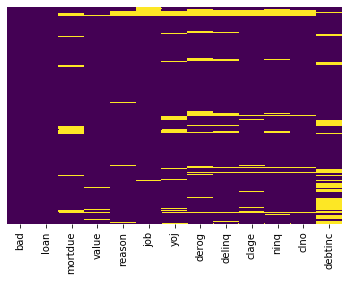

In [471]:
mydata=main(df)
mydata.allinfo()


In [472]:
mydata.nullvalues_table()

,Eksik Değerler,% Değeri
bad,0,0.000000
loan,0,0.000000
mortdue,314,8.780761
value,64,1.789709
reason,147,4.110738
job,167,4.670022
yoj,312,8.724832
derog,427,11.940716
delinq,351,9.815436
clage,179,5.005593


In [473]:
mydata.fillna("job", 'Mode')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


In [474]:
mydata.fillna("reason", 'Mode')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


In [475]:
mydata.fillna("clno", 'Mode')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


In [476]:
mydata.fillna("value", 'Mode')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,80000.0,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


In [477]:
mydata.fillna("yoj", 'Mean')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,80000.0,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,NaN


In [478]:
mydata.fillna("clage", 'Mean')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,80000.0,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,NaN


In [479]:
mydata.fillna("mortdue", 'Mode')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,80000.0,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,50000.0,25010.0,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,NaN


In [480]:
mydata.fillna("ninq", 'Mode')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,80000.0,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,50000.0,25010.0,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,NaN


In [481]:
mydata.fillna("delinq", 'Mode')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,80000.0,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,50000.0,25010.0,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,NaN


In [482]:
mydata.fillna("derog", 'Mean')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,80000.0,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,50000.0,25010.0,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,NaN


In [483]:
mydata.fillna("debtinc", 'Mean')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042000
1,0,12600,103960.0,127384.0,DebtCon,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479000
2,0,18000,46865.0,61266.0,DebtCon,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354000
3,0,10300,57676.0,71027.0,DebtCon,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992000
4,0,9400,56508.0,78358.0,DebtCon,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,33.831737
3572,1,21600,154991.0,80000.0,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015000
3573,1,24000,35000.0,80000.0,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,33.831737
3574,1,10000,50000.0,25010.0,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,33.831737


bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64


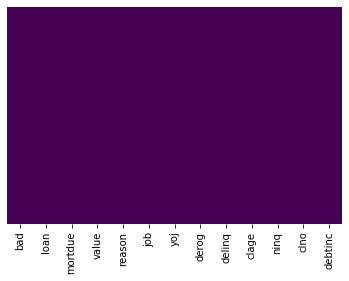

In [484]:
mydata.isnull()

In [485]:
mydata.cat_data()

Categorical Data:         reason    job
0     HomeImp  Other
1     DebtCon  Other
2     DebtCon  Other
3     DebtCon  Other
4     DebtCon  Other
...       ...    ...
3571  DebtCon   Self
3572  DebtCon   Self
3573  DebtCon   Self
3574  HomeImp   Self
3575  DebtCon   Self

[3576 rows x 2 columns]


In [486]:
mydata.num_data()

Numerical Data:        bad   loan   mortdue     value        yoj  derog  delinq   clage  ninq  \
0       0  81200   18834.0  108355.0  28.000000    0.0     0.0  139.14   0.0   
1       0  12600  103960.0  127384.0   2.000000    0.0     0.0  129.02   0.0   
2       0  18000   46865.0   61266.0   5.000000    0.0     0.0  102.59   2.0   
3       0  10300   57676.0   71027.0  19.000000    0.0     0.0  157.52   1.0   
4       0   9400   56508.0   78358.0  17.000000    0.0     0.0  141.93   0.0   
...   ...    ...       ...       ...        ...    ...     ...     ...   ...   
3571    1   8400   31800.0   72000.0   8.832644    0.0     2.0  187.27   1.0   
3572    1  21600  154991.0   80000.0   8.832644    2.0     4.0  165.60   0.0   
3573    1  24000   35000.0   80000.0   3.000000    1.0     0.0  177.50   0.0   
3574    1  10000   50000.0   25010.0   5.000000    0.0     3.0  326.13   4.0   
3575    1   5900   50000.0   28000.0   1.000000    2.0     1.0   36.77   1.0   

      clno    debtinc 

In [487]:
mydata.label_encoder("reason")

0       1
1       0
2       0
3       0
4       0
       ..
3571    0
3572    0
3573    0
3574    1
3575    0
Name: reason, Length: 3576, dtype: int32


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,1,Other,28.000000,0.0,0.0,139.14,0.0,14.0,34.042000
1,0,12600,103960.0,127384.0,0,Other,2.000000,0.0,0.0,129.02,0.0,25.0,34.479000
2,0,18000,46865.0,61266.0,0,Other,5.000000,0.0,0.0,102.59,2.0,9.0,26.354000
3,0,10300,57676.0,71027.0,0,Other,19.000000,0.0,0.0,157.52,1.0,11.0,33.992000
4,0,9400,56508.0,78358.0,0,Other,17.000000,0.0,0.0,141.93,0.0,11.0,32.327000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,0,Self,8.832644,0.0,2.0,187.27,1.0,21.0,33.831737
3572,1,21600,154991.0,80000.0,0,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015000
3573,1,24000,35000.0,80000.0,0,Self,3.000000,1.0,0.0,177.50,0.0,16.0,33.831737
3574,1,10000,50000.0,25010.0,1,Self,5.000000,0.0,3.0,326.13,4.0,17.0,33.831737


In [488]:
mydata.label_encoder("job")

0       2
1       2
2       2
3       2
4       2
       ..
3571    5
3572    5
3573    5
3574    5
3575    5
Name: job, Length: 3576, dtype: int32


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,1,2,28.000000,0.0,0.0,139.14,0.0,14.0,34.042000
1,0,12600,103960.0,127384.0,0,2,2.000000,0.0,0.0,129.02,0.0,25.0,34.479000
2,0,18000,46865.0,61266.0,0,2,5.000000,0.0,0.0,102.59,2.0,9.0,26.354000
3,0,10300,57676.0,71027.0,0,2,19.000000,0.0,0.0,157.52,1.0,11.0,33.992000
4,0,9400,56508.0,78358.0,0,2,17.000000,0.0,0.0,141.93,0.0,11.0,32.327000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,0,5,8.832644,0.0,2.0,187.27,1.0,21.0,33.831737
3572,1,21600,154991.0,80000.0,0,5,8.832644,2.0,4.0,165.60,0.0,43.0,38.015000
3573,1,24000,35000.0,80000.0,0,5,3.000000,1.0,0.0,177.50,0.0,16.0,33.831737
3574,1,10000,50000.0,25010.0,1,5,5.000000,0.0,3.0,326.13,4.0,17.0,33.831737


In [489]:
mydata.num_data()

Numerical Data:        bad   loan   mortdue     value  reason  job        yoj  derog  delinq  \
0       0  81200   18834.0  108355.0       1    2  28.000000    0.0     0.0   
1       0  12600  103960.0  127384.0       0    2   2.000000    0.0     0.0   
2       0  18000   46865.0   61266.0       0    2   5.000000    0.0     0.0   
3       0  10300   57676.0   71027.0       0    2  19.000000    0.0     0.0   
4       0   9400   56508.0   78358.0       0    2  17.000000    0.0     0.0   
...   ...    ...       ...       ...     ...  ...        ...    ...     ...   
3571    1   8400   31800.0   72000.0       0    5   8.832644    0.0     2.0   
3572    1  21600  154991.0   80000.0       0    5   8.832644    2.0     4.0   
3573    1  24000   35000.0   80000.0       0    5   3.000000    1.0     0.0   
3574    1  10000   50000.0   25010.0       1    5   5.000000    0.0     3.0   
3575    1   5900   50000.0   28000.0       0    5   1.000000    2.0     1.0   

       clage  ninq  clno    debtin

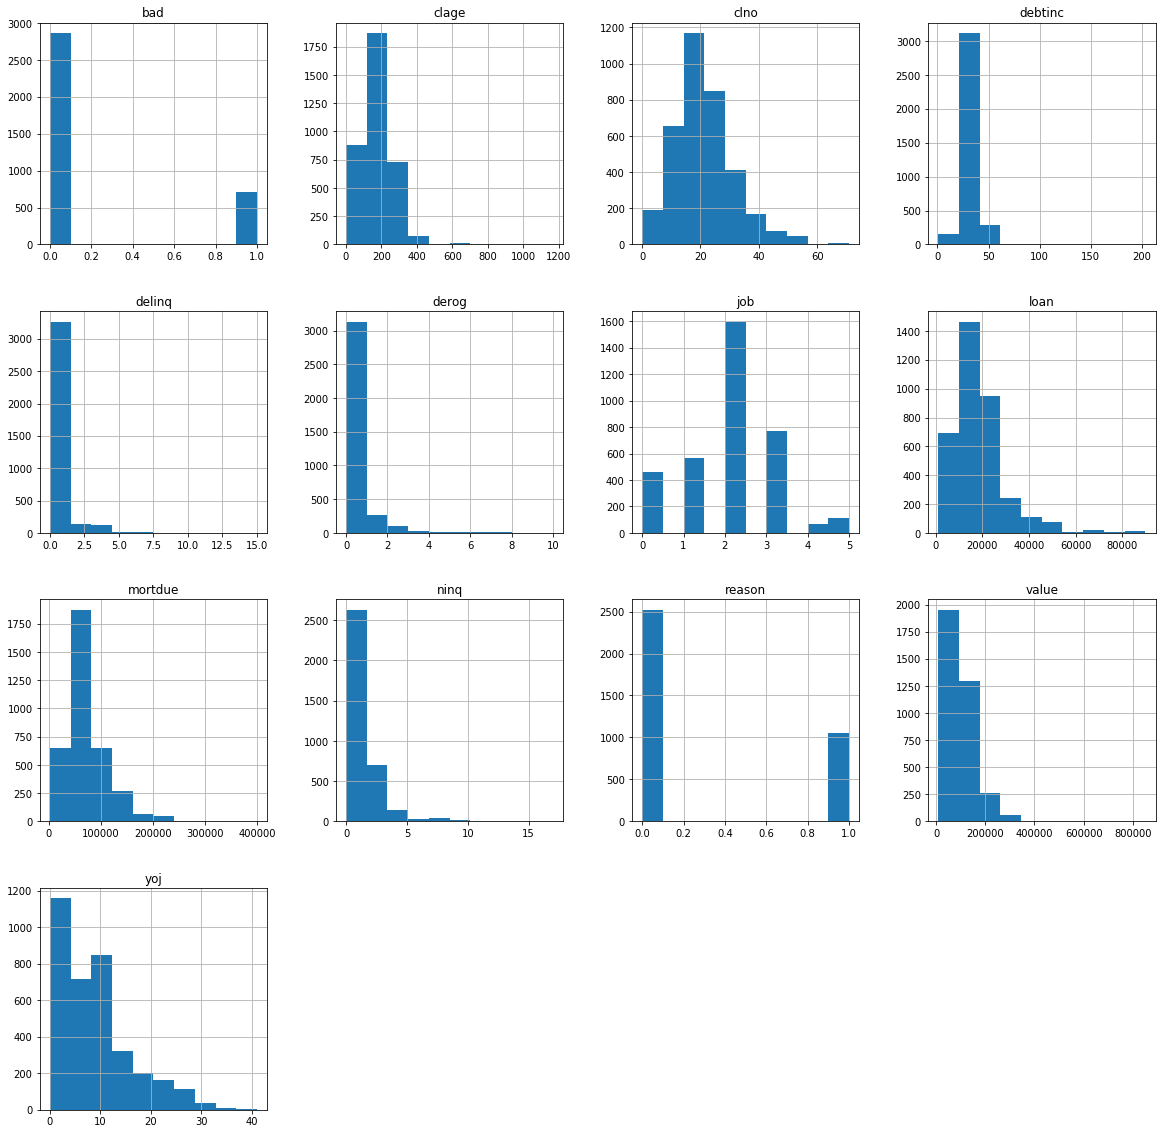

In [490]:
mydata.histogramall()

In [491]:
mydata.piechart("bad")

In [492]:
mydata.piechart("reason")

In [493]:
mydata.piechart("job")

In [494]:
mydata.crosstab("job","bad")

bad     0    1
job           
0     354  107
1     494   75
2    1252  346
3     639  128
4      43   23
5      81   34


In [495]:
mydata.crosstab("job","reason")

reason     0    1
job              
0        357  104
1        391  178
2       1142  456
3        519  248
4         60    6
5         49   66


In [496]:
mydata.shapiro("bad")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.489151      0.0


In [497]:
mydata.shapiro("loan")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.849326      0.0


In [498]:
mydata.shapiro("debtinc")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.756824      0.0


In [499]:
mydata.shapiro("yoj")

Sample does not look Gaussian (reject H0)
   Test Statistic       p-Value
0        0.907395  3.314071e-42


In [500]:
mydata.shapiro("delinq")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.424459      0.0


In [501]:
mydata.shapiro("clno")

Sample does not look Gaussian (reject H0)
   Test Statistic       p-Value
0         0.96236  1.517794e-29


In [502]:
mydata.shapiro("clage")

Sample does not look Gaussian (reject H0)
   Test Statistic       p-Value
0        0.919564  4.541706e-40


In [503]:
mydata.shapiro("mortdue")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.863198      0.0


In [504]:
mydata.shapiro("value")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.844598      0.0


In [505]:
mydata.shapiro("derog")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.355944      0.0


In [506]:
mydata.shapiro("ninq")

Sample does not look Gaussian (reject H0)
   Test Statistic  p-Value
0        0.667671      0.0


In [508]:
mydata.copy()

      bad   loan   mortdue     value  reason  job        yoj  derog  delinq  \
0       0  81200   18834.0  108355.0       1    2  28.000000    0.0     0.0   
1       0  12600  103960.0  127384.0       0    2   2.000000    0.0     0.0   
2       0  18000   46865.0   61266.0       0    2   5.000000    0.0     0.0   
3       0  10300   57676.0   71027.0       0    2  19.000000    0.0     0.0   
4       0   9400   56508.0   78358.0       0    2  17.000000    0.0     0.0   
...   ...    ...       ...       ...     ...  ...        ...    ...     ...   
3571    1   8400   31800.0   72000.0       0    5   8.832644    0.0     2.0   
3572    1  21600  154991.0   80000.0       0    5   8.832644    2.0     4.0   
3573    1  24000   35000.0   80000.0       0    5   3.000000    1.0     0.0   
3574    1  10000   50000.0   25010.0       1    5   5.000000    0.0     3.0   
3575    1   5900   50000.0   28000.0       0    5   1.000000    2.0     1.0   

       clage  ninq  clno    debtinc  
0     139.14 